In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import pdb
import warnings
import sys

sys.path.append('../')
from lib import get_openml_db
from scripts.finetune.tune.tune_dataset_details import get_dataset_details
# from utils import get_config

warnings.filterwarnings('ignore')
from lib import OPENML_CHECKPOINT as CHECKPOINT_DIR
from lib import FINETUNE_OPENML_DATA as FINETUNE_DATA


In [16]:
# picked_dataset_ids = [3, 31, 1464, 334, 50, 37] #, 333, 1504, 1494, 1510, 1489]
reduce_data = 0.8
model_name = 'tv7.4'
df = {'did': [], 
      'train_data':[], 
      'val_data':[], 
      'test_data':[], 
      'features after OHE':[], 
      '# categorical':[], 
      '# numerical':[],
      'class_ratio': []
      }
with open('../openml_datasets.txt') as f:            
    dataset_ids = [line.strip() for line in f]

for did in dataset_ids:
    db_details = get_dataset_details(reduce_data=reduce_data, task='openml', model=model_name, dataset= did)
    df['did'].append(did)
    df['train_data'].append(db_details['train'])
    df['val_data'].append(db_details['val'])
    df['test_data'].append(db_details['test'])

    num_features = db_details['dataset'].X_num['train'].shape[1] if db_details['dataset'].X_num is not None else 0
    if num_features == 0:
        num_features = db_details['dataset'].X_cat['train'].shape[1] if db_details['dataset'].X_cat is not None else 0
        
    # df['features after OHE'].append(num_features)
    df['features after OHE'].append(num_features)
    no_cat = db_details['dataset'].X_cat['train'].shape[1] if db_details['dataset'].X_cat is not None else 0
    df['# categorical'].append(no_cat)
    no_num = db_details['dataset'].X_num['train'].shape[1] if db_details['dataset'].X_num is None else 0
    df['# numerical'].append(no_num)
    df['class_ratio'].append(db_details['dataset'].y['train'].sum()/db_details['train'])
    
dataset_details = pd.DataFrame(df)

Dataset details:
	Shapes => train= (383, 73), val= (96, 73), test= (1598, 73)
	Positive points=> train= 200.0, val= 50.0, test= 834.0
Dataset details:
	Shapes => train= (83, 9), val= (21, 9), test= (350, 9)
	Positive points=> train= 29.0, val= 7.0, test= 120.0
Dataset details:
	Shapes => train= (82, 40), val= (21, 40), test= (346, 40)
	Positive points=> train= 45.0, val= 12.0, test= 192.0
Dataset details:
	Shapes => train= (120, 54), val= (30, 54), test= (500, 54)
	Positive points=> train= 84.0, val= 21.0, test= 350.0
Dataset details:
	Shapes => train= (92, 8), val= (23, 8), test= (384, 8)
	Positive points=> train= 32.0, val= 8.0, test= 134.0
Dataset details:
	Shapes => train= (552, 57), val= (138, 57), test= (2302, 57)
	Positive points=> train= 218.0, val= 54.0, test= 908.0
Dataset details:
	Shapes => train= (114, 27), val= (29, 27), test= (480, 27)
	Positive points=> train= 74.0, val= 19.0, test= 314.0
Dataset details:
	Shapes => train= (5436, 7), val= (1360, 7), test= (22656, 7)
	Po

In [17]:
dataset_details

,did,train_data,val_data,test_data,features after OHE,# categorical,# numerical,class_ratio
0,3,383,96,1598,73,0,0,0.522193
1,15,83,21,350,9,0,0,0.349398
2,29,82,21,346,40,0,0,0.548780
3,31,120,30,500,54,0,0,0.700000
4,37,92,23,384,8,0,0,0.347826
5,44,552,138,2302,57,0,0,0.394928
6,50,114,29,480,27,0,0,0.649123
7,151,5436,1360,22656,7,0,0,0.424577
8,38,452,113,1886,47,0,0,0.061947
9,1049,174,44,730,37,0,0,0.126437


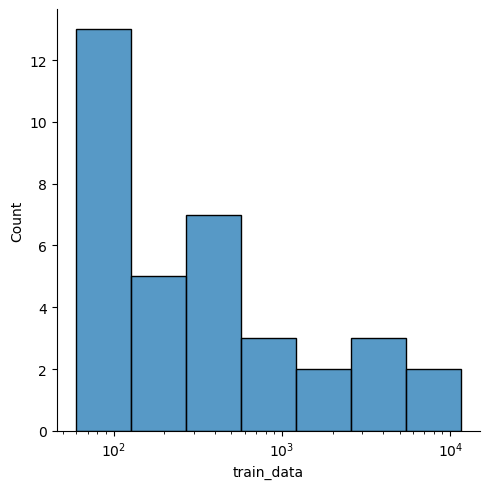

In [19]:
sns.displot(data = dataset_details['train_data'], log_scale=True)

In [27]:
dataset_details[['train_data', 'did']].sort_values('train_data')['did'].to_list()

['23381',
 '1063',
 '40994',
 '6332',
 '1510',
 '1480',
 '29',
 '15',
 '1464',
 '37',
 '50',
 '31',
 '1494',
 '1068',
 '1462',
 '1049',
 '1050',
 '1067',
 '1487',
 '1485',
 '3',
 '40978',
 '4134',
 '38',
 '44',
 '40983',
 '40701',
 '1489',
 '1053',
 '4534',
 '1486',
 '1461',
 '151',
 '1590',
 '23517']